In [ ]:
import logging
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import Callback

In [7]:
# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

class WeightsLoggerCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Log weights and biases
        weights = []
        biases_dense = []

        for layer in self.model.layers:
            if 'conv' in layer.name:
                filters, biases_Conv = layer.get_weights()
                logger.info(f"{layer.name} filters shape: {filters.shape}")
                logger.info(f"{layer.name} biases_Conv shape: {biases_Conv.shape}")
                # Log filters and biases
                logger.info(f"Filters: {filters}")
                logger.info(f"Biases: {biases_Conv}")
            elif 'dense' in layer.name:
                x, y = layer.get_weights()
                weights.append(x)
                biases_dense.append(y)
                logger.info(f"{layer.name} weights shape: {x.shape}")
                logger.info(f"{layer.name} biases_dense shape: {y.shape}")
                # Log weights and biases
                logger.info(f"Weights: {x}")
                logger.info(f"Biases: {y}")
            else:
                logger.info(f"{layer.name} has no weights to display")

        # Plot Conv2D filters
        for layer in self.model.layers:
            if 'conv' in layer.name:
                filters, _ = layer.get_weights()

                fig, axes = plt.subplots(1, 2, figsize=(10, 5))
                ax = axes[0]
                ax.imshow(filters[:, :, 0, 0], cmap='gray')
                ax.set_title('Filter 1')
                ax.axis('off')
                for (i, j), val in np.ndenumerate(filters[:, :, 0, 0]):
                    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='red', fontsize=8)

                ax = axes[1]
                ax.imshow(filters[:, :, 0, 1], cmap='gray')
                ax.set_title('Filter 2')
                ax.axis('off')
                for (i, j), val in np.ndenumerate(filters[:, :, 0, 1]):
                    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='red', fontsize=8)

                plt.show()

                for i in range(filters.shape[3]):
                    mean = np.mean(filters[:, :, 0, i])
                    variance = np.var(filters[:, :, 0, i])
                    logger.info(f"Conv Layer {i + 1} Weights:")
                    logger.info(f"Mean: {mean}")
                    logger.info(f"Variance: {variance}")

                    biases_Conv = biases_Conv if biases_Conv.size > 0 else np.zeros((filters.shape[3],))
                    mean = np.mean(biases_Conv)
                    variance = np.var(biases_Conv)
                    logger.info(f"Conv Layer {i + 1} Biases:")
                    logger.info(f"Mean: {mean}")
                    logger.info(f"Variance: {variance}")
                    logger.info("-" * 30)


In [8]:
mnist = keras.datasets.mnist
(x_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Selecting 5 samples each from digit '0' and '1'
x = np.concatenate([x_train_full[y_train_full == 0][:5], x_train_full[y_train_full == 1][:5]])
y = np.concatenate([y_train_full[y_train_full == 0][:5], y_train_full[y_train_full == 1][:5]])
x_test=np.concatenate([X_test[y_test == 0][:5], X_test[y_test == 1][:5]])
y_test=np.concatenate([y_test[y_test == 0][:5], y_test[y_test == 1][:5]])
logger.info(x.shape)

# Reshape x to add a channel dimension (for Conv2D layers)
'''
 if x originally has a shape of (10, 784), and you want to reshape it into images of shape 28x28, 
 the -1 lets NumPy calculate that the number of images is 10. The resulting shape will be (10, 28, 28, 1).
'''
x = x.reshape(-1, 28, 28, 1)
x_test=x_test.reshape(-1, 28, 28, 1)


INFO:__main__:(10, 28, 28)


Epoch 1/5


c:\Users\nandi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1112 - loss: -2582783744.0000

INFO:__main__:conv2d_1 filters shape: (3, 3, 1, 2)
INFO:__main__:conv2d_1 biases_Conv shape: (2,)
INFO:__main__:Filters: [[[[3.4103174 3.563909 ]]

  [[4.2535024 3.9186163]]

  [[4.179581  3.4475813]]]


 [[[4.0572853 3.5945153]]

  [[4.1216793 4.1769595]]

  [[4.2484603 3.7803867]]]


 [[[4.0284257 4.132799 ]]

  [[4.120894  3.5075974]]

  [[3.554053  4.2579093]]]]
INFO:__main__:Biases: [3.8543253 3.8479567]
INFO:__main__:max_pooling2d_1 has no weights to display
INFO:__main__:flatten_1 has no weights to display
INFO:__main__:dense_3 weights shape: (338, 169)
INFO:__main__:dense_3 biases_dense shape: (169,)
INFO:__main__:Weights: [[-4.8409943e-02  3.6985421e+00 -5.6551911e-02 ...  3.6892715e+00
  -4.6585787e-02  3.5819221e+00]
 [-1.2719803e-01  3.5524061e+00 -1.9037677e-02 ...  3.6581538e+00
   6.4746156e-02  3.6872163e+00]
 [-9.7641431e-02  3.3057926e+00  7.8357838e-02 ...  3.1670485e+00
  -2.6937658e-03  3.2687378e+00]
 ...
 [ 4.5244467e-02  1.5564175e+00  2.9048391e-02 ...  1.39805

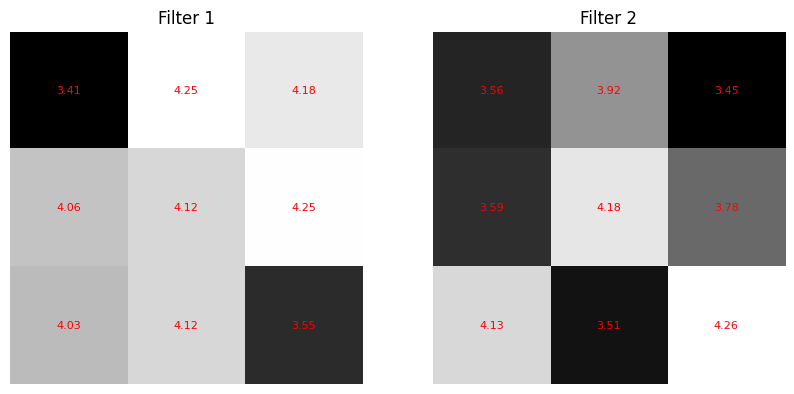

INFO:__main__:Conv Layer 1 Weights:
INFO:__main__:Mean: 3.9971330165863037
INFO:__main__:Variance: 0.08203070610761642
INFO:__main__:Conv Layer 1 Biases:
INFO:__main__:Mean: 3.8511409759521484
INFO:__main__:Variance: 1.0139884579984937e-05
INFO:__main__:------------------------------
INFO:__main__:Conv Layer 2 Weights:
INFO:__main__:Mean: 3.8200302124023438
INFO:__main__:Variance: 0.08678214997053146
INFO:__main__:Conv Layer 2 Biases:
INFO:__main__:Mean: 3.8511409759521484
INFO:__main__:Variance: 1.0139884579984937e-05
INFO:__main__:------------------------------


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1112 - loss: -2607983104.0000
Epoch 2/5
1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1124 - loss: -134552150016.0000

INFO:__main__:conv2d_1 filters shape: (3, 3, 1, 2)
INFO:__main__:conv2d_1 biases_Conv shape: (2,)
INFO:__main__:Filters: [[[[6.546586  6.695612 ]]

  [[7.388387  7.050133 ]]

  [[7.3128242 6.5788984]]]


 [[[7.1929502 6.7260466]]

  [[7.2569504 7.3079977]]

  [[7.3826294 6.9106493]]]


 [[[7.162607  7.2622423]]

  [[7.255345  6.6374536]]

  [[6.688348  7.38502  ]]]]
INFO:__main__:Biases: [6.9935994 6.9826217]
INFO:__main__:max_pooling2d_1 has no weights to display
INFO:__main__:flatten_1 has no weights to display
INFO:__main__:dense_3 weights shape: (338, 169)
INFO:__main__:dense_3 biases_dense shape: (169,)
INFO:__main__:Weights: [[-4.8409943e-02  6.7973914e+00 -5.6551911e-02 ...  6.7855458e+00
  -4.6585787e-02  6.6823149e+00]
 [-1.2719803e-01  6.6487288e+00 -1.9037677e-02 ...  6.7518768e+00
   6.4746156e-02  6.7850790e+00]
 [-9.7641431e-02  5.9815655e+00  7.8357838e-02 ...  5.8405008e+00
  -2.6937658e-03  5.9459000e+00]
 ...
 [ 4.5244467e-02  2.7450185e+00  2.9048391e-02 ...  2.58566

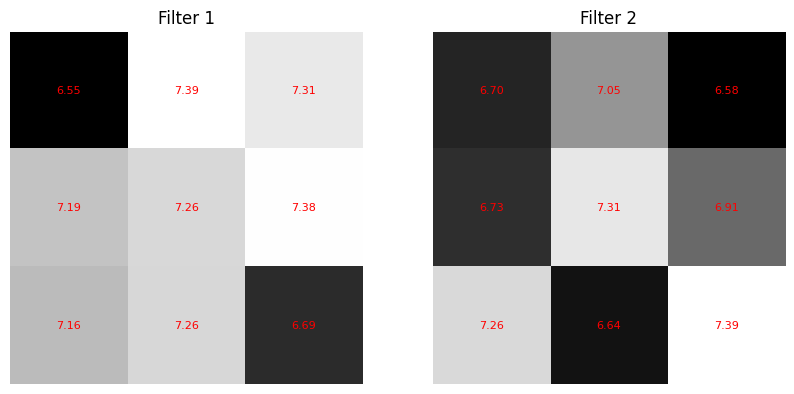

INFO:__main__:Conv Layer 1 Weights:
INFO:__main__:Mean: 7.131846904754639
INFO:__main__:Variance: 0.08180686086416245
INFO:__main__:Conv Layer 1 Biases:
INFO:__main__:Mean: 6.988110542297363
INFO:__main__:Variance: 3.012772140209563e-05
INFO:__main__:------------------------------
INFO:__main__:Conv Layer 2 Weights:
INFO:__main__:Mean: 6.950450420379639
INFO:__main__:Variance: 0.08630479872226715
INFO:__main__:Conv Layer 2 Biases:
INFO:__main__:Mean: 6.988110542297363
INFO:__main__:Variance: 3.012772140209563e-05
INFO:__main__:------------------------------


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1124 - loss: -135306944512.0000
Epoch 3/5
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1135 - loss: -861785358336.0000

INFO:__main__:conv2d_1 filters shape: (3, 3, 1, 2)
INFO:__main__:conv2d_1 biases_Conv shape: (2,)
INFO:__main__:Filters: [[[[ 9.230214   9.3768835]]

  [[10.072155   9.732085 ]]

  [[ 9.996113   9.261013 ]]]


 [[[ 9.876764   9.407839 ]]

  [[ 9.94109    9.989958 ]]

  [[10.066386   9.592317 ]]]


 [[[ 9.84601    9.94306  ]]

  [[ 9.939083   9.318589 ]]

  [[ 9.371504  10.064579 ]]]]
INFO:__main__:Biases: [9.683083 9.66966 ]
INFO:__main__:max_pooling2d_1 has no weights to display
INFO:__main__:flatten_1 has no weights to display
INFO:__main__:dense_3 weights shape: (338, 169)
INFO:__main__:dense_3 biases_dense shape: (169,)
INFO:__main__:Weights: [[-4.8409943e-02  9.3626623e+00 -5.6551911e-02 ...  9.3499060e+00
  -4.6585787e-02  9.2481718e+00]
 [-1.2719803e-01  9.2161360e+00 -1.9037677e-02 ...  9.3183918e+00
   6.4746156e-02  9.3530626e+00]
 [-9.7641431e-02  8.1859751e+00  7.8357838e-02 ...  8.0441132e+00
  -2.6937658e-03  8.1507902e+00]
 ...
 [ 4.5244467e-02  3.7538331e+00  2.9048391e

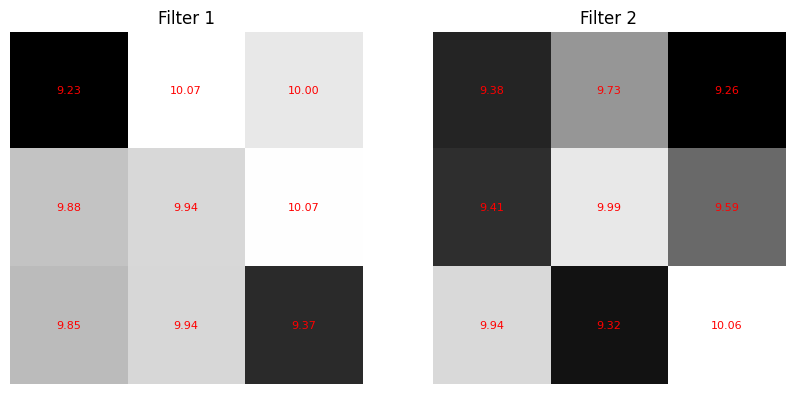

INFO:__main__:Conv Layer 1 Weights:
INFO:__main__:Mean: 9.81548023223877
INFO:__main__:Variance: 0.08187317848205566
INFO:__main__:Conv Layer 1 Biases:
INFO:__main__:Mean: 9.676370620727539
INFO:__main__:Variance: 4.504400567384437e-05
INFO:__main__:------------------------------
INFO:__main__:Conv Layer 2 Weights:
INFO:__main__:Mean: 9.631814002990723
INFO:__main__:Variance: 0.08608872443437576
INFO:__main__:Conv Layer 2 Biases:
INFO:__main__:Mean: 9.676370620727539
INFO:__main__:Variance: 4.504400567384437e-05
INFO:__main__:------------------------------


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1135 - loss: -862532141056.0000
Epoch 4/5
1865/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1119 - loss: -2681928155136.0000

INFO:__main__:conv2d_1 filters shape: (3, 3, 1, 2)
INFO:__main__:conv2d_1 biases_Conv shape: (2,)
INFO:__main__:Filters: [[[[11.701706  11.846863 ]]

  [[12.544085  12.202771 ]]

  [[12.467166  11.731134 ]]]


 [[[12.348759  11.878428 ]]

  [[12.413492  12.460929 ]]

  [[12.538053  12.062584 ]]]


 [[[12.317371  12.4129305]]

  [[12.411272  11.789289 ]]

  [[11.843006  12.533984 ]]]]
INFO:__main__:Biases: [12.157446 12.142445]
INFO:__main__:max_pooling2d_1 has no weights to display
INFO:__main__:flatten_1 has no weights to display
INFO:__main__:dense_3 weights shape: (338, 169)
INFO:__main__:dense_3 biases_dense shape: (169,)
INFO:__main__:Weights: [[-4.84099425e-02  1.17743521e+01 -5.65519109e-02 ...  1.17611475e+01
  -4.65857871e-02  1.16601839e+01]
 [-1.27198026e-01  1.16235142e+01 -1.90376770e-02 ...  1.17252588e+01
   6.47461563e-02  1.17607431e+01]
 [-9.76414308e-02  1.02217426e+01  7.83578381e-02 ...  1.00794697e+01
  -2.69376580e-03  1.01868229e+01]
 ...
 [ 4.52444665e-02  4.67

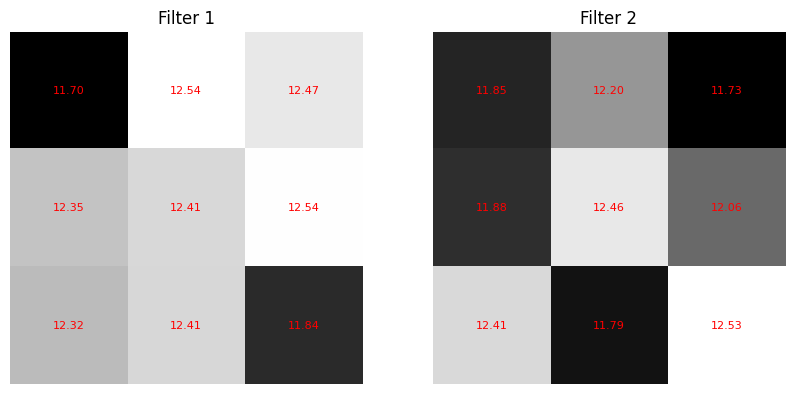

INFO:__main__:Conv Layer 1 Weights:
INFO:__main__:Mean: 12.287212371826172
INFO:__main__:Variance: 0.08193992078304291
INFO:__main__:Conv Layer 1 Biases:
INFO:__main__:Mean: 12.149945259094238
INFO:__main__:Variance: 5.625972698908299e-05
INFO:__main__:------------------------------
INFO:__main__:Conv Layer 2 Weights:
INFO:__main__:Mean: 12.10210132598877
INFO:__main__:Variance: 0.08602608740329742
INFO:__main__:Conv Layer 2 Biases:
INFO:__main__:Mean: 12.149945259094238
INFO:__main__:Variance: 5.625972698908299e-05
INFO:__main__:------------------------------


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1119 - loss: -2686200840192.0000
Epoch 5/5
1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1124 - loss: -6168951914496.0000

INFO:__main__:conv2d_1 filters shape: (3, 3, 1, 2)
INFO:__main__:conv2d_1 biases_Conv shape: (2,)
INFO:__main__:Filters: [[[[14.041997  14.186083 ]]

  [[14.885044  14.542853 ]]

  [[14.807885  14.071182 ]]]


 [[[14.689804  14.218481 ]]

  [[14.754995  14.8014765]]

  [[14.878744  14.402339 ]]]


 [[[14.658373  14.752814 ]]

  [[14.75224   14.129217 ]]

  [[14.1829815 14.872507 ]]]]
INFO:__main__:Biases: [14.503295 14.48722 ]
INFO:__main__:max_pooling2d_1 has no weights to display
INFO:__main__:flatten_1 has no weights to display
INFO:__main__:dense_3 weights shape: (338, 169)
INFO:__main__:dense_3 biases_dense shape: (169,)
INFO:__main__:Weights: [[-4.8409943e-02  1.4023915e+01 -5.6551911e-02 ...  1.4010421e+01
  -4.6585787e-02  1.3909950e+01]
 [-1.2719803e-01  1.3875546e+01 -1.9037677e-02 ...  1.3977006e+01
   6.4746156e-02  1.4012984e+01]
 [-9.7641431e-02  1.2182397e+01  7.8357838e-02 ...  1.2039853e+01
  -2.6937658e-03  1.2147644e+01]
 ...
 [ 4.5244467e-02  5.5524535e+00  2.904839

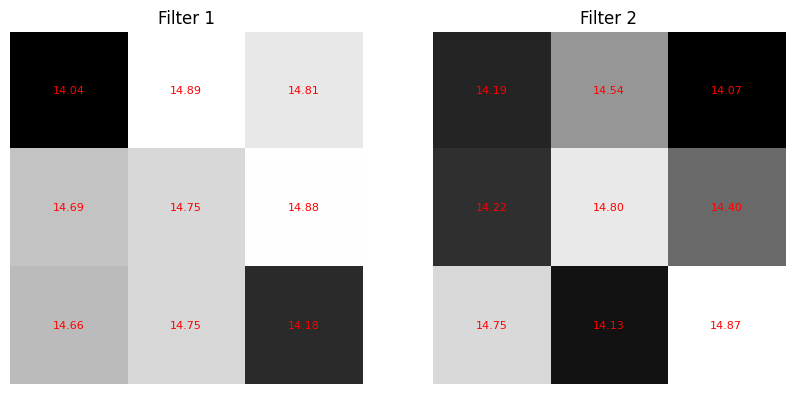

INFO:__main__:Conv Layer 1 Weights:
INFO:__main__:Mean: 14.628007888793945
INFO:__main__:Variance: 0.08211663365364075
INFO:__main__:Conv Layer 1 Biases:
INFO:__main__:Mean: 14.495257377624512
INFO:__main__:Variance: 6.460248550865799e-05
INFO:__main__:------------------------------
INFO:__main__:Conv Layer 2 Weights:
INFO:__main__:Mean: 14.44188404083252
INFO:__main__:Variance: 0.08596697449684143
INFO:__main__:Conv Layer 2 Biases:
INFO:__main__:Mean: 14.495257377624512
INFO:__main__:Variance: 6.460248550865799e-05
INFO:__main__:------------------------------


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1124 - loss: -6176973520896.0000


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Example model setup
model = Sequential([
    layers.Conv2D(2, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(169, activation='relu'),
    layers.Dense(13, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Initialize the custom callback
weights_logger = WeightsLoggerCallback()

# Train the model
model.fit(x_train_full, y_train_full, epochs=5, callbacks=[weights_logger])
